In [1]:
import numpy as np
from onset_detection import detected_samples
import matplotlib.pyplot as plt
import helper
import scipy.io.wavfile as wav
from datetime import datetime
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/midi')
from midi import process_midi_to_note_info, notes_to_chords, dict_to_frequency_list, plot_piece



In [9]:
import sounddevice as sd
duration = 5.5  # seconds

def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    print(indata)

with sd.Stream(channels=1, callback=callback):
    sd.sleep(int(duration * 1000))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

Press Ctrl+C to stop the stream
input overflow
Root Mean Square (RMS): 0.0003483459586277604
Root Mean Square (RMS): 0.0014157730620354414
Root Mean Square (RMS): 0.004775822628289461
Root Mean Square (RMS): 0.005759872496128082
Root Mean Square (RMS): 0.0072289020754396915
Root Mean Square (RMS): 0.009322388097643852
Root Mean Square (RMS): 0.01067727617919445
Root Mean Square (RMS): 0.011645672842860222
Root Mean Square (RMS): 0.010960686951875687
Root Mean Square (RMS): 0.011140737682580948
Root Mean Square (RMS): 0.010338989086449146
Root Mean Square (RMS): 0.007108987774699926
Root Mean Square (RMS): 0.007469160482287407
Root Mean Square (RMS): 0.009780325926840305
Root Mean Square (RMS): 0.008110050112009048
Root Mean Square (RMS): 0.006620598956942558
Root Mean Square (RMS): 0.008816611021757126
Root Mean Square (RMS): 0.009168014861643314
Root Mean Square (RMS): 0.006358576938509941
Root Mean Square (RMS): 0.007138958666473627
Root Mean Square (RMS): 0.007259879726916552
Root M

/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models/onset_detection.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(path)


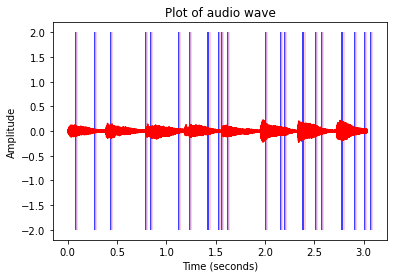

sorted time keys:  [13.5, 15.0, 49.0, 76, 97, 287.89, 9876, 12987.4]
scale frequencies:  [[262], [294], [330], [349], [392], [440], [494], [523]]
8


In [61]:

scale_dict = {13.5: [262], 15.0: [294], 49.0: [330], 76: [349], 97: [392], 287.89: [440], 9876: [494], 12987.4: [523]}  # Made up midi to chords file
sorted_time_keys = sorted(scale_dict.keys(), reverse=False)
score = [scale_dict[key] for key in sorted_time_keys]
link =     '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/scale.wav'
sample_data, sample_rate, onset_times = detected_samples(
link, sample_length=500, offset=2000, show=True, delta=0.015, num_samples=None)
plt.show()
time_samples = np.linspace(
    0, len(sample_data[0])/sample_rate, len(sample_data[0]))
prob_matrix = np.zeros((len(score), len(sample_data)))

print('sorted time keys: ', sorted_time_keys)
print('score frequencies: ' , score)
print(len(scale))

In [58]:
print(onset_times)

[0.0461678  0.24353741 0.4060771  0.75437642 0.8124263  1.09106576
 1.20716553 1.39292517 1.49741497 1.5322449  1.59029478 1.97342404
 2.12435374 2.17079365 2.35655329 2.48426304 2.54231293 2.75129252
 2.87900227 2.98349206 3.04154195]


In [62]:
def oltw(sample_data, score, time_samples):
    note_num, audio_num = 0, -1
    path = []
    for sample in sample_data[:-2]:
        min_val = np.inf
        current_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=score[note_num])
        
        # End cases (If we reach the end of the score)
        if (note_num != len(score)-2) and (note_num != len(score) - 1):
            next_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=score[note_num+1])
            next_next_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=score[note_num+2])
        elif note_num ==len(score)-2:
            next_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=score[note_num+1])
            next_next_notes_prob = np.inf
        else:
            next_notes_prob = np.inf
            next_next_notes_prob = np.inf
        
        if current_notes_prob < min_val:
            # Hasn't moved on
            min_val = current_notes_prob
            step = (note_num, audio_num+1)
        if next_notes_prob < min_val:
            # Has moved to next note
            min_val = next_notes_prob
            step = (note_num+1, audio_num+1)
        if next_next_notes_prob < min_val:
            # Has moved on to the next next one
            min_val = next_next_notes_prob
            step = (note_num+2, audio_num+1)
        note_num, audio_num = step
        path.append(step)
    return path

path = oltw(sample_data, score, time_samples)



100%|██████████| 15/15 [00:00<00:00, 944.65it/s]
1it [00:00, 55.63it/s]
100%|██████████| 15/15 [00:00<00:00, 1026.62it/s]
1it [00:00, 56.42it/s]
100%|██████████| 15/15 [00:00<00:00, 860.73it/s]
1it [00:00, 49.63it/s]
100%|██████████| 15/15 [00:00<00:00, 944.18it/s]
1it [00:00, 55.46it/s]
100%|██████████| 15/15 [00:00<00:00, 913.63it/s]
1it [00:00, 53.13it/s]
100%|██████████| 15/15 [00:00<00:00, 1087.83it/s]
1it [00:00, 61.35it/s]
100%|██████████| 15/15 [00:00<00:00, 971.32it/s]
1it [00:00, 56.19it/s]

[ 0.03241016  0.02831639  0.02259826  0.01560921  0.00822467  0.00140033
 -0.00408709 -0.00773946 -0.00964383 -0.0101256  -0.00994512 -0.01018859
 -0.01174433 -0.01496389 -0.02005502 -0.02706132 -0.03559817 -0.04492716
 -0.05388939 -0.06160362 -0.0675634  -0.07206767 -0.07604739 -0.08056464
 -0.08643893 -0.0935202  -0.10116055 -0.10787162 -0.11180156 -0.11168248
 -0.10702561 -0.09844768 -0.08753587 -0.07633623 -0.06656214 -0.05935549
 -0.05540476 -0.05459527 -0.0560504  -0.05865426 -0.06086506 -0.06128788
 -0.05907296 -0.05395743 -0.04662071 -0.03813456 -0.02981558 -0.02304781
 -0.01872852 -0.01712529 -0.01798366 -0.02037362 -0.02301412 -0.02453823
 -0.0234815  -0.01898087 -0.01097525 -0.00024014  0.0118698   0.02405387
  0.03515403  0.04460879  0.05246964  0.05885263  0.06439549  0.06963971
  0.07457114  0.07912183  0.08318719  0.0867909   0.08981045  0.09252322
  0.09510643  0.09702983  0.09792492  0.0970616   0.09359154  0.08740401
  0.07899382  0.06966193  0.06113107  0.05488228  0


100%|██████████| 15/15 [00:00<00:00, 749.93it/s]
1it [00:00, 43.56it/s]
100%|██████████| 15/15 [00:00<00:00, 920.65it/s]
1it [00:00, 52.86it/s]
100%|██████████| 15/15 [00:00<00:00, 881.17it/s]
1it [00:00, 50.90it/s]
100%|██████████| 15/15 [00:00<00:00, 714.74it/s]
1it [00:00, 38.01it/s]
100%|██████████| 15/15 [00:00<00:00, 692.11it/s]
1it [00:00, 38.00it/s]

[-0.05571899 -0.03427155 -0.02465546 -0.0255747  -0.03302997 -0.04384688
 -0.05650816 -0.0688173  -0.07709621 -0.07691718 -0.0662973  -0.04806798
 -0.02824078 -0.01228682 -0.00260066  0.00177194  0.00280802  0.0015398
 -0.00175192 -0.00667194 -0.01182476 -0.01495907 -0.01436975 -0.01005637
 -0.0035348   0.00350618  0.01037509  0.01735351  0.0252892   0.0341046
  0.04332095  0.05272796  0.06222183  0.07156705  0.07809599  0.07802565
  0.06899919  0.05204606  0.0326918   0.01800507  0.01325072  0.01980918
  0.03494925  0.05435804  0.07455365  0.09277236  0.10693758  0.11560973
  0.11711708  0.11012468  0.09435347  0.07178774  0.04661745  0.02307331
  0.00416253 -0.00919311 -0.01716177 -0.01953215 -0.01565882 -0.00528336
  0.01048451  0.02882667  0.04495046  0.05375127  0.05151135  0.03719893
  0.01362049 -0.01350502 -0.03692238 -0.04977931 -0.04726614 -0.02824264
  0.00312565  0.03802627  0.06565502  0.07769635  0.07190394  0.05136153
  0.02201468 -0.00973516 -0.03884281 -0.06094958 -0.0


100%|██████████| 15/15 [00:00<00:00, 778.66it/s]
1it [00:00, 44.76it/s]
100%|██████████| 15/15 [00:00<00:00, 964.50it/s]
1it [00:00, 53.82it/s]
100%|██████████| 15/15 [00:00<00:00, 983.35it/s]
1it [00:00, 56.11it/s]
100%|██████████| 15/15 [00:00<00:00, 1025.35it/s]
1it [00:00, 59.38it/s]
100%|██████████| 15/15 [00:00<00:00, 1047.62it/s]
1it [00:00, 58.45it/s]
100%|██████████| 15/15 [00:00<00:00, 924.21it/s]
1it [00:00, 54.78it/s]
100%|██████████| 15/15 [00:00<00:00, 1141.22it/s]
1it [00:00, 65.15it/s]

[-0.00917797 -0.01512982 -0.02031045 -0.02226613 -0.01833254 -0.00725461
  0.00994205  0.0290185   0.04394641  0.0505008   0.04790121  0.03913629
  0.02870502  0.01936975  0.01210664  0.0069037   0.00422921  0.00569106
  0.01139067  0.01927023  0.02658017  0.03175035  0.03543435  0.03927367
  0.04423663  0.04961399  0.05446402  0.05885255  0.06318714  0.06699598
  0.06808636  0.06428154  0.05526729  0.04303794  0.03115772  0.02269968
  0.01919335  0.02033541  0.02460795  0.02992143  0.03435223  0.03681672
  0.03709592  0.03580027  0.03372035  0.03204392  0.03242587  0.03639933
  0.04457131  0.05645618  0.06989622  0.08147366  0.08806323  0.08701447
  0.07762661  0.06154168  0.04291433  0.02748881  0.01970155  0.02167672
  0.0323843   0.04844529  0.06561209  0.07941983  0.08637464  0.08509643
  0.0770727   0.06591837  0.05549324  0.04856372  0.04546381  0.0442218
  0.04254413  0.03841126  0.03109191  0.02135125  0.01048663 -0.00026737
 -0.00990799 -0.0166047  -0.01794463 -0.01213231  0.


100%|██████████| 15/15 [00:00<00:00, 976.83it/s]
1it [00:00, 56.21it/s]
100%|██████████| 15/15 [00:00<00:00, 958.33it/s]
1it [00:00, 56.00it/s]
100%|██████████| 15/15 [00:00<00:00, 910.74it/s]
1it [00:00, 50.80it/s]
100%|██████████| 15/15 [00:00<00:00, 896.64it/s]
1it [00:00, 51.66it/s]
100%|██████████| 15/15 [00:00<00:00, 1021.57it/s]
1it [00:00, 57.89it/s]
100%|██████████| 15/15 [00:00<00:00, 549.09it/s]
1it [00:00, 33.53it/s]


[-0.06864675 -0.05694363 -0.04582806 -0.03644767 -0.02946744 -0.02447256
 -0.02087491 -0.01863185 -0.01771522 -0.01820665 -0.02000189 -0.02256766
 -0.02532783 -0.02795299 -0.03008323 -0.03077704 -0.02894355 -0.02432407
 -0.01730169 -0.00910508 -0.00131767  0.00515024  0.00976569  0.01258738
  0.01442288  0.01678458  0.02114469  0.02797457  0.03714638  0.04794524
  0.05918763  0.06968413  0.07812917  0.08399054  0.08724976  0.08843035
  0.08861805  0.08814541  0.08696887  0.08486968  0.08205737  0.07909853
  0.07693186  0.07635579  0.07768349  0.08163638  0.08845816  0.0974158
  0.10664929  0.11394203  0.11714911  0.11518887  0.10808202  0.09663972
  0.083234    0.07077995  0.06228725  0.05976045  0.0640394   0.07410863
  0.0873369   0.10107889  0.11246294  0.11935713  0.12082006  0.1171786
  0.10945121  0.09896856  0.08721411  0.07513214  0.06321845  0.05164485
  0.04068037  0.03078233  0.02221903  0.0148555   0.00843115  0.00255467
 -0.00340505 -0.0101218  -0.01781543 -0.02626636 -0.0

100%|██████████| 15/15 [00:00<00:00, 602.57it/s]
1it [00:00, 33.54it/s]
100%|██████████| 15/15 [00:00<00:00, 690.95it/s]
1it [00:00, 40.79it/s]
100%|██████████| 15/15 [00:00<00:00, 877.56it/s]
1it [00:00, 50.67it/s]
100%|██████████| 15/15 [00:00<00:00, 861.22it/s]
1it [00:00, 50.11it/s]
100%|██████████| 15/15 [00:00<00:00, 949.78it/s]
1it [00:00, 53.77it/s]
100%|██████████| 15/15 [00:00<00:00, 1027.73it/s]

[ 1.97692565e-03  3.96761019e-03  6.12683035e-03  8.06258805e-03
  9.53650102e-03  1.05427615e-02  1.11238519e-02  1.10337464e-02
  1.06691932e-02  1.02989506e-02  9.99679230e-03  9.78116877e-03
  9.52419639e-03  9.23680048e-03  8.89235456e-03  8.43948964e-03
  7.89585058e-03  7.53903901e-03  7.29862368e-03  7.32375868e-03
  7.56657496e-03  7.62643246e-03  7.42187770e-03  6.76607294e-03
  5.48666622e-03  3.75743653e-03  1.92495063e-03  3.12156801e-04
 -5.40643989e-04 -4.18578595e-04  5.68973133e-04  2.14732904e-03
  3.93558666e-03  5.44942729e-03  6.10697642e-03  6.01518294e-03
  5.33560757e-03  3.88994673e-03  2.01789429e-03  1.99766189e-04
 -1.50471821e-03 -3.20599275e-03 -4.88620345e-03 -6.50127232e-03
 -8.23522545e-03 -9.90032591e-03 -1.12318918e-02 -1.21479118e-02
 -1.24712866e-02 -1.22689465e-02 -1.16815744e-02 -1.08997114e-02
 -1.00106560e-02 -9.40758735e-03 -9.41477809e-03 -9.99586750e-03
 -1.10563533e-02 -1.20663056e-02 -1.28442813e-02 -1.31562520e-02
 -1.24838557e-02 -1.07941


1it [00:00, 57.08it/s]
100%|██████████| 15/15 [00:00<00:00, 851.46it/s]
1it [00:00, 48.61it/s]
100%|██████████| 15/15 [00:00<00:00, 960.18it/s]
1it [00:00, 54.14it/s]
100%|██████████| 15/15 [00:00<00:00, 1011.60it/s]
1it [00:00, 58.09it/s]
100%|██████████| 15/15 [00:00<00:00, 1033.20it/s]
1it [00:00, 59.65it/s]
100%|██████████| 15/15 [00:00<00:00, 829.47it/s]
1it [00:00, 48.45it/s]
100%|██████████| 15/15 [00:00<00:00, 1009.82it/s]
1it [00:00, 54.91it/s]
100%|██████████| 15/15 [00:00<00:00, 982.83it/s]
1it [00:00, 57.39it/s]

[ 3.92252505e-02  3.41238044e-02  2.68180966e-02  1.85830779e-02
  1.12884771e-02  7.07964599e-03  7.52914557e-03  1.27170095e-02
  2.14933772e-02  3.19987275e-02  4.21594419e-02  5.02170920e-02
  5.51252365e-02  5.65881804e-02  5.52988686e-02  5.26149645e-02
  5.01531549e-02  4.94117141e-02  5.11665307e-02  5.54084405e-02
  6.15489259e-02  6.86217323e-02  7.55765513e-02  8.16025063e-02
  8.58235210e-02  8.75037983e-02  8.61610174e-02  8.14448893e-02
  7.37604499e-02  6.43582866e-02  5.48479557e-02  4.71495427e-02
  4.28519100e-02  4.23141830e-02  4.48844843e-02  4.89311591e-02
  5.22593409e-02  5.28638177e-02  4.96151075e-02  4.27642427e-02
  3.35196145e-02  2.36755516e-02  1.50901163e-02  8.78634118e-03
  4.87918919e-03  2.82570580e-03  1.81969674e-03  1.11491943e-03
  8.85165646e-05 -1.35991571e-03 -3.39923054e-03 -6.34235935e-03
 -1.03328954e-02 -1.55462222e-02 -2.21822336e-02 -3.00042070e-02
 -3.83981466e-02 -4.67404872e-02 -5.37948906e-02 -5.88782877e-02
 -6.18180372e-02 -6.25519


100%|██████████| 15/15 [00:00<00:00, 560.02it/s]
1it [00:00, 31.94it/s]
100%|██████████| 15/15 [00:00<00:00, 731.35it/s]
1it [00:00, 34.20it/s]
100%|██████████| 15/15 [00:00<00:00, 953.79it/s]
1it [00:00, 54.60it/s]
100%|██████████| 15/15 [00:00<00:00, 974.92it/s]
1it [00:00, 54.27it/s]
100%|██████████| 15/15 [00:00<00:00, 1015.52it/s]
1it [00:00, 58.89it/s]
100%|██████████| 15/15 [00:00<00:00, 1102.31it/s]
1it [00:00, 63.00it/s]

[ 0.0612059   0.06375957  0.06701873  0.0706465   0.07396737  0.07622688
  0.07682992  0.07523481  0.07149933  0.06603909  0.05927785  0.05204388
  0.04522112  0.03941657  0.0349086   0.03164938  0.02925247  0.02718954
  0.02472159  0.02104728  0.01592222  0.00945068  0.00192889 -0.00616497
 -0.01404711 -0.02106632 -0.02670309 -0.03049843 -0.03259714 -0.03329233
 -0.03325728 -0.03347817 -0.03464625 -0.03724809 -0.0414997  -0.04711173
 -0.05348876 -0.05994109 -0.06554483 -0.06965363 -0.07197142 -0.07240118
 -0.07116044 -0.06902254 -0.06685302 -0.06521278 -0.0647602  -0.06589095
 -0.06866387 -0.07273935 -0.07757002 -0.08233014 -0.08615562 -0.0885151
 -0.08913834 -0.08805656 -0.08525953 -0.0811322  -0.07611592 -0.07052201
 -0.0646024  -0.05853681 -0.05247892 -0.04648279 -0.0406715  -0.03479501
 -0.02889926 -0.0230132  -0.01704951 -0.01131647 -0.00582157 -0.0006334
  0.0041984   0.00869702  0.0129604   0.01702115  0.02065256  0.0236947
  0.02590472  0.02746364  0.02841965  0.02866138  0.02


100%|██████████| 15/15 [00:00<00:00, 900.16it/s]
1it [00:00, 52.51it/s]
100%|██████████| 15/15 [00:00<00:00, 968.24it/s]
1it [00:00, 55.95it/s]
100%|██████████| 15/15 [00:00<00:00, 1119.56it/s]
1it [00:00, 62.90it/s]
100%|██████████| 15/15 [00:00<00:00, 1113.49it/s]
1it [00:00, 61.52it/s]
100%|██████████| 15/15 [00:00<00:00, 1024.32it/s]
1it [00:00, 59.83it/s]
100%|██████████| 15/15 [00:00<00:00, 1082.40it/s]
1it [00:00, 61.45it/s]
100%|██████████| 15/15 [00:00<00:00, 959.81it/s]
1it [00:00, 55.98it/s]
0it [00:00, ?it/s]

[-0.12255588 -0.11898123 -0.11499428 -0.10806219 -0.09645092 -0.08046269
 -0.06272774 -0.04705535 -0.03766228 -0.03675385 -0.04380156 -0.05612983
 -0.07000107 -0.08141843 -0.08737376 -0.08713581 -0.08180138 -0.07454401
 -0.06914485 -0.06854982 -0.07471316 -0.08706807 -0.10260651 -0.11735591
 -0.12753135 -0.13001576 -0.12319133 -0.1076671  -0.08532196 -0.05866392
 -0.03029671 -0.00224419  0.02428041  0.04823835  0.0687628   0.0851535
  0.09684747  0.10419812  0.10844358  0.11140171  0.11478093  0.11973201
  0.12609598  0.13266206  0.13766745  0.13894589  0.13492982  0.12527995
  0.11118855  0.09436313  0.07732419  0.06294826  0.05277786  0.04731702
  0.04569392  0.04651626  0.04894904  0.05264507  0.05816327  0.06621428
  0.07699656  0.08988435  0.10327814  0.11528683  0.1236937   0.12666878
  0.12353393  0.11512868  0.10388323  0.09265283  0.08365408  0.07739735
  0.07268844  0.06664305  0.05599637  0.03851277  0.01330835 -0.01778433
 -0.05115367 -0.08233001 -0.10724082 -0.12389816 -0.

100%|██████████| 15/15 [00:00<00:00, 910.30it/s]
1it [00:00, 48.52it/s]


[(0, 0), (0, 1), (1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (5, 13), (6, 14), (6, 15), (6, 16), (7, 17), (7, 18)]


<ipython-input-63-54f109290c92>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(link)


IndexError: list index out of range

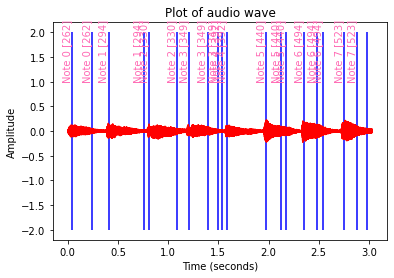

In [63]:
print(path)
sample_rate, data = wav.read(link)
audio_duration = len(data)/sample_rate
time_samples = np.linspace(0, audio_duration, len(data))
helper.plot_audio(time_samples, data)

for i, time in enumerate(onset_times):
    plt.vlines(time , ymin=-
                       2, ymax=2, colors='blue', zorder=2)
    note = path[i][0]
    plt.text(time, 1, f'Note {note} {scale[note]}', color='#FF69B4', ha='right', va='bottom', rotation=90)


In [ ]:
def lml_table(sample_data, scale):
    for i, sample in enumerate(sample_data):
        for j in range(len(scale)):
            prob_matrix[j, i] = helper.stable_nlml(time_samples, sample, f=scale[j])
    return prob_matrix

prob_mat = lml_table(sample_data, scale)

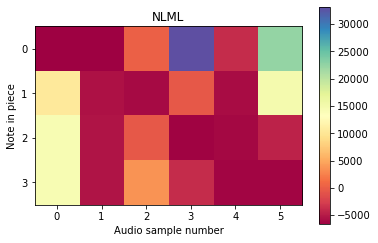

In [16]:
plt.imshow(prob_mat, cmap='Spectral', interpolation='nearest')
plt.title("NLML")
plt.colorbar()
plt.xlabel("Audio sample number")
plt.ylabel("Note in piece")
plt.yticks(range(len(prob_mat)))
plt.show()

In [17]:
print(prob_mat)

[[-6641.62772705 -6676.58125837   186.72302477 33156.84922748
  -3786.39894122 22443.81694993]
 [10455.07850761 -5572.921462   -6014.91598131  -406.43495516
  -5771.47186649 14935.46389152]
 [14375.19923678 -5330.91665192  -447.15618385 -6427.23487009
  -6132.09641231 -4354.08945841]
 [14464.86215519 -5332.09256669  3727.89786058 -3868.25721382
  -6262.02246184 -6228.59875011]]


In [20]:

def min_path(table):
    i, j = 0, 0
    path = [(i,j)]
    # While less than number of audio samples
    while i < table.shape[1]-2:
        minval = np.inf
        if table[i+1, j] < minval:
            minval = table[i+1, j]
            step = (i+1, j)
        if table[i+1, j+1] < minval:
            minval = table[i+1, j+1]
            step = (i+1, j+1)
        if table[i+1, j+2] < minval:
            minval = table[i+1, j+2]
            step = (i+1, j+2)
        path.append(step)
        i,j = step
    return np.array(path)

In [21]:
path = min_path(prob_mat)
print(path)

IndexError: index 4 is out of bounds for axis 0 with size 4